IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


DATA TASKS

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October         

In [4]:
num_bins = 2

bed_days_min = filtered_data['Severity'].min()
bed_days_max = filtered_data['Severity'].max()

bin_width = (bed_days_max - bed_days_min) / num_bins
bins = [bed_days_min + i * bin_width for i in range(num_bins + 1)]

def bin_function(x):
    for i in range(1, len(bins)):
        if x <= bins[i]:
            return i - 1
    return i

filtered_data['Bed_days_category'] = filtered_data['Severity'].apply(bin_function)

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1292/4218815035.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Bed_days_category'] = filtered_data['Severity'].apply(bin_function)


In [5]:
filtered_data['Bed_days_category'].value_counts()

Bed_days_category
0    12274
1      308
Name: count, dtype: int64

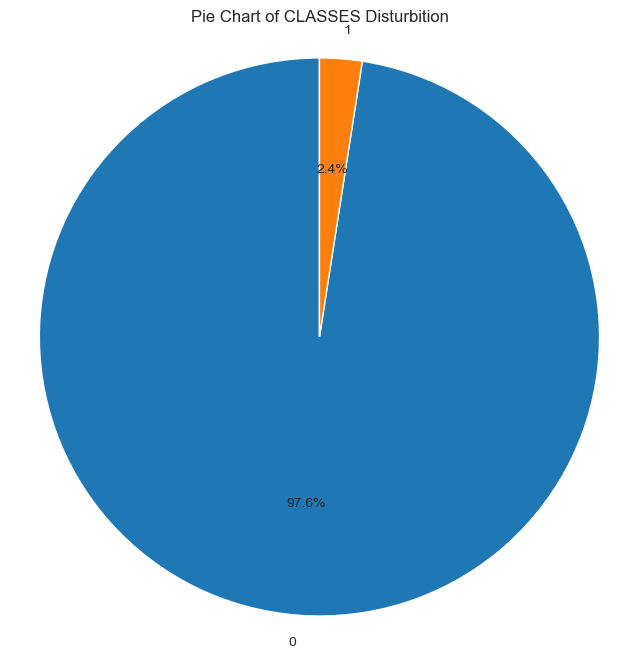

In [6]:
import matplotlib.pyplot as plt

value_counts = filtered_data['Bed_days_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Pie Chart of CLASSES Disturbition')
plt.show()

In [7]:
from xgboost import XGBClassifier

X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   
                   'Male','Female',
                   
                   'Regional','MajorCities',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data['Bed_days_category']


LEARN SIMPLE XGBOOST WITH 10 fold


In [8]:

# Number of folds
n_splits =10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred_xgb = xgb_model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)
 

Confusion Matrix for Fold 1:
 [[1221    7]
 [   6   25]]
Confusion Matrix for Fold 2:
 [[1217   11]
 [   9   22]]
Confusion Matrix for Fold 3:
 [[1225    2]
 [  10   21]]
Confusion Matrix for Fold 4:
 [[1222    5]
 [   4   27]]
Confusion Matrix for Fold 5:
 [[1220    7]
 [   4   27]]
Confusion Matrix for Fold 6:
 [[1219    8]
 [   5   26]]
Confusion Matrix for Fold 7:
 [[1225    2]
 [   8   23]]
Confusion Matrix for Fold 8:
 [[1220    7]
 [  10   21]]
Confusion Matrix for Fold 9:
 [[1224    4]
 [   7   23]]
Confusion Matrix for Fold 10:
 [[1219    9]
 [   6   24]]
Mean Accuracy: 0.9895887290364701
Accuracy Std Dev: 0.0025472344290426263
Mean Precision: 0.8012658253463879
Precision Std Dev: 0.07678825116672497
Mean Recall: 0.7760215053763441
Recall Std Dev: 0.06968214838591537
Mean F1-score: 0.7849055943313302
F1-score Std Dev: 0.04985136908306482
Mean Confusion Matrix:
 [[1221.2    6.2]
 [   6.9   23.9]]


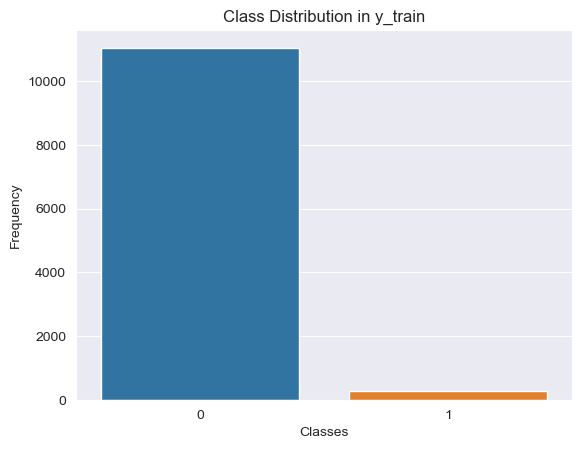

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# فرض کنیم y_train از قبل تعریف شده است و شامل داده‌های شما است
value_counts = y_train.value_counts()

# استفاده از seaborn برای رسم نمودار
sns.barplot(x=value_counts.index, y=value_counts.values)

# تنظیمات نمایش
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution in y_train')
plt.xticks(
    
)  # چرخاندن نام کلاس‌ها در محور x برای خوانایی بهتر
plt.show()


In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from xgboost import XGBClassifier
import numpy as np
###################################################XGBOOSTT
# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Choose an oversampling method
# oversampler = SMOTE(random_state=42)
# oversampler = ADASYN(random_state=42)
oversampler = RandomOverSampler(random_state=42)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train_resampled, y_train_resampled)
    
    y_pred_xgb = xgb_model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1215   13]
 [   5   26]]
Confusion Matrix for Fold 2:
 [[1211   17]
 [   6   25]]
Confusion Matrix for Fold 3:
 [[1221    6]
 [   5   26]]
Confusion Matrix for Fold 4:
 [[1218    9]
 [   4   27]]
Confusion Matrix for Fold 5:
 [[1217   10]
 [   4   27]]
Confusion Matrix for Fold 6:
 [[1211   16]
 [   4   27]]
Confusion Matrix for Fold 7:
 [[1218    9]
 [   5   26]]
Confusion Matrix for Fold 8:
 [[1217   10]
 [   4   27]]
Confusion Matrix for Fold 9:
 [[1217   11]
 [   7   23]]
Confusion Matrix for Fold 10:
 [[1212   16]
 [   5   25]]
Mean Accuracy: 0.9868070401850713
Accuracy Std Dev: 0.0029756345679834333
Mean Precision: 0.694085502676182
Precision Std Dev: 0.06662736113308307
Mean Recall: 0.8406451612903225
Recall Std Dev: 0.03222507273464125
Mean F1-score: 0.7587974788195855
F1-score Std Dev: 0.045976746994405876
Mean Confusion Matrix:
 [[1215.7   11.7]
 [   4.9   25.9]]


In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.svm import SVC
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Choose an oversampling method
# oversampler = SMOTE(random_state=42)
# oversampler = ADASYN(random_state=42)
oversampler = RandomOverSampler(random_state=42)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Initialize SVM model
    svm_model = SVC(random_state=42)
    svm_model.fit(X_train_resampled, y_train_resampled)
    
    y_pred_svm = svm_model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_svm))
    precision_list.append(precision_score(y_test, y_pred_svm))
    recall_list.append(recall_score(y_test, y_pred_svm))
    f1_list.append(f1_score(y_test, y_pred_svm))
    
    conf_matrix = confusion_matrix(y_test, y_pred_svm)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1208   20]
 [   2   29]]
Confusion Matrix for Fold 2:
 [[1204   24]
 [   2   29]]
Confusion Matrix for Fold 3:
 [[1214   13]
 [   2   29]]
Confusion Matrix for Fold 4:
 [[1209   18]
 [   1   30]]
Confusion Matrix for Fold 5:
 [[1210   17]
 [   1   30]]
Confusion Matrix for Fold 6:
 [[1207   20]
 [   2   29]]
Confusion Matrix for Fold 7:
 [[1213   14]
 [   0   31]]
Confusion Matrix for Fold 8:
 [[1211   16]
 [   2   29]]
Confusion Matrix for Fold 9:
 [[1213   15]
 [   4   26]]
Confusion Matrix for Fold 10:
 [[1207   21]
 [   1   29]]
Mean Accuracy: 0.9845022357310353
Accuracy Std Dev: 0.002709063268576261
Mean Precision: 0.6232097018321874
Precision Std Dev: 0.04388346836738251
Mean Recall: 0.9446236559139786
Recall Std Dev: 0.033341136790371664
Mean F1-score: 0.7500062913156477
F1-score Std Dev: 0.03559699193613409
Mean Confusion Matrix:
 [[1209.6   17.8]
 [   1.7   29.1]]


In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Choose an oversampling method
# oversampler = SMOTE(random_state=42)
# oversampler = ADASYN(random_state=42)
oversampler = RandomOverSampler(random_state=42)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Initialize Decision Tree model
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_resampled, y_train_resampled)
    
    y_pred_dt = dt_model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_dt))
    precision_list.append(precision_score(y_test, y_pred_dt))
    recall_list.append(recall_score(y_test, y_pred_dt))
    f1_list.append(f1_score(y_test, y_pred_dt))
    
    conf_matrix = confusion_matrix(y_test, y_pred_dt)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1219    9]
 [  11   20]]
Confusion Matrix for Fold 2:
 [[1214   14]
 [  11   20]]
Confusion Matrix for Fold 3:
 [[1219    8]
 [  13   18]]
Confusion Matrix for Fold 4:
 [[1223    4]
 [   9   22]]
Confusion Matrix for Fold 5:
 [[1225    2]
 [  11   20]]
Confusion Matrix for Fold 6:
 [[1217   10]
 [  11   20]]
Confusion Matrix for Fold 7:
 [[1220    7]
 [  15   16]]
Confusion Matrix for Fold 8:
 [[1222    5]
 [  14   17]]
Confusion Matrix for Fold 9:
 [[1222    6]
 [  12   18]]
Confusion Matrix for Fold 10:
 [[1221    7]
 [  11   19]]
Mean Accuracy: 0.98489950259562
Accuracy Std Dev: 0.0028409697050806805
Mean Precision: 0.7341258258160102
Precision Std Dev: 0.08715376534231865
Mean Recall: 0.6168817204301075
Recall Std Dev: 0.05340536672085466
Mean F1-score: 0.6675354861824166
F1-score Std Dev: 0.05391443128825033
Mean Confusion Matrix:
 [[1220.2    7.2]
 [  11.8   19. ]]


In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Choose an oversampling method
# oversampler = SMOTE(random_state=42)
# oversampler = ADASYN(random_state=42)
oversampler = RandomOverSampler(random_state=42)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Initialize Logistic Regression model
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X_train_resampled, y_train_resampled)
    
    y_pred_lr = lr_model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_lr))
    precision_list.append(precision_score(y_test, y_pred_lr))
    recall_list.append(recall_score(y_test, y_pred_lr))
    f1_list.append(f1_score(y_test, y_pred_lr))
    
    conf_matrix = confusion_matrix(y_test, y_pred_lr)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0).astype(int)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1199   29]
 [   0   31]]
Confusion Matrix for Fold 2:
 [[1201   27]
 [   1   30]]
Confusion Matrix for Fold 3:
 [[1204   23]
 [   0   31]]
Confusion Matrix for Fold 4:
 [[1199   28]
 [   0   31]]
Confusion Matrix for Fold 5:
 [[1204   23]
 [   0   31]]
Confusion Matrix for Fold 6:
 [[1196   31]
 [   0   31]]
Confusion Matrix for Fold 7:
 [[1200   27]
 [   0   31]]
Confusion Matrix for Fold 8:
 [[1201   26]
 [   0   31]]
Confusion Matrix for Fold 9:
 [[1207   21]
 [   0   30]]
Confusion Matrix for Fold 10:
 [[1204   24]
 [   0   30]]
Mean Accuracy: 0.9793358723391895
Accuracy Std Dev: 0.002381737060211165
Mean Precision: 0.5438687590518757
Precision Std Dev: 0.02707496551598276
Mean Recall: 0.9967741935483871
Recall Std Dev: 0.009677419354838701
Mean F1-score: 0.7033717071159239
F1-score Std Dev: 0.023294786425939195
Mean Confusion Matrix:
 [[1201   25]
 [   0   30]]


In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.neural_network import MLPClassifier
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Choose an oversampling method
# oversampler = SMOTE(random_state=42)
# oversampler = ADASYN(random_state=42)
oversampler = RandomOverSampler(random_state=42)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Initialize MLP model
    mlp_model = MLPClassifier(random_state=42, max_iter=1000)
    mlp_model.fit(X_train_resampled, y_train_resampled)
    
    y_pred_mlp = mlp_model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_mlp))
    precision_list.append(precision_score(y_test, y_pred_mlp))
    recall_list.append(recall_score(y_test, y_pred_mlp))
    f1_list.append(f1_score(y_test, y_pred_mlp))
    
    conf_matrix = confusion_matrix(y_test, y_pred_mlp)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1218   10]
 [   5   26]]
Confusion Matrix for Fold 2:
 [[1219    9]
 [   6   25]]
Confusion Matrix for Fold 3:
 [[1222    5]
 [   8   23]]
Confusion Matrix for Fold 4:
 [[1220    7]
 [   7   24]]
Confusion Matrix for Fold 5:
 [[1217   10]
 [   3   28]]
Confusion Matrix for Fold 6:
 [[1217   10]
 [   5   26]]
Confusion Matrix for Fold 7:
 [[1221    6]
 [   7   24]]
Confusion Matrix for Fold 8:
 [[1220    7]
 [   6   25]]
Confusion Matrix for Fold 9:
 [[1223    5]
 [   9   21]]
Confusion Matrix for Fold 10:
 [[1217   11]
 [   5   25]]
Mean Accuracy: 0.9887936270616269
Accuracy Std Dev: 0.0008282872888799066
Mean Precision: 0.7595589539307082
Precision Std Dev: 0.04074017705357847
Mean Recall: 0.8017204301075269
Recall Std Dev: 0.054332898159468866
Mean F1-score: 0.7775030140563909
F1-score Std Dev: 0.01659025582406715
Mean Confusion Matrix:
 [[1219.4    8. ]
 [   6.1   24.7]]


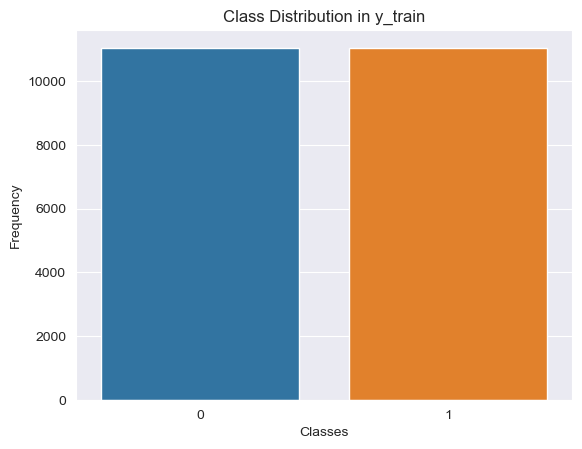

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# فرض کنیم y_train از قبل تعریف شده است و شامل داده‌های شما است
value_counts = y_train_resampled.value_counts()

# استفاده از seaborn برای رسم نمودار
sns.barplot(x=value_counts.index, y=value_counts.values)

# تنظیمات نمایش
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution in y_train')
plt.xticks(
    
)  # چرخاندن نام کلاس‌ها در محور x برای خوانایی بهتر
plt.show()

learn with  SMOTE over sampling


In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from xgboost import XGBClassifier
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Choose an oversampling method
oversampler = SMOTE(random_state=42)
# oversampler = ADASYN(random_state=42)
#oversampler = RandomOverSampler(random_state=42)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train_resampled, y_train_resampled)
    
    y_pred_xgb = xgb_model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1210   18]
 [   4   27]]
Confusion Matrix for Fold 2:
 [[1210   18]
 [   6   25]]
Confusion Matrix for Fold 3:
 [[1211   16]
 [   8   23]]
Confusion Matrix for Fold 4:
 [[1211   16]
 [   3   28]]
Confusion Matrix for Fold 5:
 [[1213   14]
 [   1   30]]
Confusion Matrix for Fold 6:
 [[1207   20]
 [   4   27]]
Confusion Matrix for Fold 7:
 [[1208   19]
 [   4   27]]
Confusion Matrix for Fold 8:
 [[1206   21]
 [   4   27]]
Confusion Matrix for Fold 9:
 [[1213   15]
 [   7   23]]
Confusion Matrix for Fold 10:
 [[1206   22]
 [   5   25]]
Mean Accuracy: 0.9821173717753636
Accuracy Std Dev: 0.0025444755086620804
Mean Precision: 0.595042341511989
Precision Std Dev: 0.038876233987492154
Mean Recall: 0.8503225806451613
Recall Std Dev: 0.06265007418657462
Mean F1-score: 0.6992983450264478
F1-score Std Dev: 0.042617723369475294
Mean Confusion Matrix:
 [[1209.5   17.9]
 [   4.6   26.2]]


In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from xgboost import XGBClassifier
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Choose an oversampling method
#oversampler = SMOTE(random_state=42)
oversampler = ADASYN(random_state=42)
#oversampler = RandomOverSampler(random_state=42)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train_resampled, y_train_resampled)
    
    y_pred_xgb = xgb_model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1207   21]
 [   4   27]]
Confusion Matrix for Fold 2:
 [[1209   19]
 [   6   25]]
Confusion Matrix for Fold 3:
 [[1210   17]
 [   7   24]]
Confusion Matrix for Fold 4:
 [[1210   17]
 [   3   28]]
Confusion Matrix for Fold 5:
 [[1211   16]
 [   1   30]]
Confusion Matrix for Fold 6:
 [[1206   21]
 [   3   28]]
Confusion Matrix for Fold 7:
 [[1206   21]
 [   4   27]]
Confusion Matrix for Fold 8:
 [[1204   23]
 [   5   26]]
Confusion Matrix for Fold 9:
 [[1212   16]
 [   7   23]]
Confusion Matrix for Fold 10:
 [[1206   22]
 [   5   25]]
Mean Accuracy: 0.9810842380014926
Accuracy Std Dev: 0.002430734430531804
Mean Precision: 0.5776643106793197
Precision Std Dev: 0.03554986901953837
Mean Recall: 0.8535483870967742
Recall Std Dev: 0.05939300627284738
Mean F1-score: 0.6882502141429523
F1-score Std Dev: 0.038978157772345416
Mean Confusion Matrix:
 [[1208.1   19.3]
 [   4.5   26.3]]


LEARN LOGESTIC REGRESSION

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train Logistic Regression model
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_lr = lr_model.predict(X_test)
    
    # Store metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_lr))
    precision_list.append(precision_score(y_test, y_pred_lr))
    recall_list.append(recall_score(y_test, y_pred_lr))
    f1_list.append(f1_score(y_test, y_pred_lr))
    
    # Compute and store confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_lr)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

# Print results
print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1223    5]
 [   8   23]]
Confusion Matrix for Fold 2:
 [[1222    6]
 [   8   23]]
Confusion Matrix for Fold 3:
 [[1227    0]
 [   9   22]]
Confusion Matrix for Fold 4:
 [[1223    4]
 [   5   26]]
Confusion Matrix for Fold 5:
 [[1224    3]
 [   5   26]]
Confusion Matrix for Fold 6:
 [[1223    4]
 [   5   26]]
Confusion Matrix for Fold 7:
 [[1226    1]
 [   9   22]]
Confusion Matrix for Fold 8:
 [[1224    3]
 [   7   24]]
Confusion Matrix for Fold 9:
 [[1224    4]
 [   8   22]]
Confusion Matrix for Fold 10:
 [[1221    7]
 [   5   25]]
Mean Accuracy: 0.9915756316050667
Accuracy Std Dev: 0.0015139903351625154
Mean Precision: 0.8717231551348867
Precision Std Dev: 0.06492903048723953
Mean Recall: 0.7760215053763441
Recall Std Dev: 0.05294003876969668
Mean F1-score: 0.8182667982643531
F1-score Std Dev: 0.03205293472670594
Mean Confusion Matrix:
 [[1223.7    3.7]
 [   6.9   23.9]]


logestic with best threshold

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

def find_best_threshold(y_true, y_probs):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)
    f1_scores = 2 * precisions * recalls / (precisions + recalls)
    best_index = np.argmax(f1_scores)
    return thresholds[best_index]

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize Logistic Regression model
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    
    # Get the predicted probabilities for training set
    y_probs_train = lr_model.predict_proba(X_train)[:, 1]
    
    # Find the best threshold on the training set
    best_threshold = find_best_threshold(y_train, y_probs_train)
    
    # Apply the threshold to the test set
    y_probs_test = lr_model.predict_proba(X_test)[:, 1]
    y_pred_lr = (y_probs_test >= best_threshold).astype(int)
    
    # Calculate metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_lr))
    precision_list.append(precision_score(y_test, y_pred_lr))
    recall_list.append(recall_score(y_test, y_pred_lr))
    f1_list.append(f1_score(y_test, y_pred_lr))
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_lr)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1223    5]
 [   7   24]]
Confusion Matrix for Fold 2:
 [[1221    7]
 [   7   24]]
Confusion Matrix for Fold 3:
 [[1227    0]
 [   9   22]]
Confusion Matrix for Fold 4:
 [[1223    4]
 [   5   26]]
Confusion Matrix for Fold 5:
 [[1224    3]
 [   5   26]]
Confusion Matrix for Fold 6:
 [[1222    5]
 [   4   27]]
Confusion Matrix for Fold 7:
 [[1226    1]
 [   9   22]]
Confusion Matrix for Fold 8:
 [[1224    3]
 [   7   24]]
Confusion Matrix for Fold 9:
 [[1224    4]
 [   7   23]]
Confusion Matrix for Fold 10:
 [[1219    9]
 [   4   26]]
Mean Accuracy: 0.9916550597226204
Accuracy Std Dev: 0.0014742089697335765
Mean Precision: 0.8648867768816565
Precision Std Dev: 0.07304723543336454
Mean Recall: 0.7923655913978495
Recall Std Dev: 0.055964513970106794
Mean F1-score: 0.8230069333406362
F1-score Std Dev: 0.027884694584374665
Mean Confusion Matrix:
 [[1223.3    4.1]
 [   6.4   24.4]]


In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import GridSearchCV

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=22)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Define a function to calculate metrics for different thresholds
def evaluate_thresholds(y_true, y_pred_probs, thresholds):
    best_threshold = 0.5
    best_f1 = 0
    for threshold in thresholds:
        y_pred = (y_pred_probs[:, 1] >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

# List to store best thresholds for each fold
best_thresholds = []

# Define a function for grid search to optimize threshold
def grid_search_threshold(y_true, y_pred_probs):
    thresholds = np.arange(0.1, 0.9, 0.001)
    best_threshold, best_f1 = evaluate_thresholds(y_true, y_pred_probs, thresholds)
    return best_threshold

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred_probs = xgb_model.predict_proba(X_test)
    
    # Grid search to find the best threshold
    best_threshold = grid_search_threshold(y_test, y_pred_probs)
    best_thresholds.append(best_threshold)
    
    y_pred_xgb = (y_pred_probs[:, 1] >= best_threshold).astype(int)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)} (Threshold {best_threshold}):\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)
print('Best Thresholds:', best_thresholds)


In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Define the threshold
threshold = 0.6736736736736737

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred_proba = xgb_model.predict_proba(X_test)
    y_pred_threshold = (y_pred_proba[:, 1] >= threshold).astype(int)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_threshold))
    precision_list.append(precision_score(y_test, y_pred_threshold))
    recall_list.append(recall_score(y_test, y_pred_threshold))
    f1_list.append(f1_score(y_test, y_pred_threshold))
    
    conf_matrix = confusion_matrix(y_test, y_pred_threshold)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1224    4]
 [   8   23]]
Confusion Matrix for Fold 2:
 [[1220    8]
 [  11   20]]
Confusion Matrix for Fold 3:
 [[1227    0]
 [  11   20]]
Confusion Matrix for Fold 4:
 [[1225    2]
 [   6   25]]
Confusion Matrix for Fold 5:
 [[1222    5]
 [   5   26]]
Confusion Matrix for Fold 6:
 [[1221    6]
 [   9   22]]
Confusion Matrix for Fold 7:
 [[1226    1]
 [  10   21]]
Confusion Matrix for Fold 8:
 [[1223    4]
 [  11   20]]
Confusion Matrix for Fold 9:
 [[1228    0]
 [  11   19]]
Confusion Matrix for Fold 10:
 [[1223    5]
 [   7   23]]
Mean Accuracy: 0.9901450415513864
Accuracy Std Dev: 0.002360885984220235
Mean Precision: 0.8725794814504493
Precision Std Dev: 0.08965054039096619
Mean Recall: 0.710967741935484
Recall Std Dev: 0.07045727129455799
Mean F1-score: 0.7790263840080878
F1-score Std Dev: 0.050073122353577915
Mean Confusion Matrix:
 [[1223.9    3.5]
 [   8.9   21.9]]


In [14]:



from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=22)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Define a function to calculate metrics for different thresholds
def evaluate_thresholds(y_true, y_pred_probs, thresholds):
    best_threshold = 0.5
    best_f1 = 0
    for threshold in thresholds:
        y_pred = (y_pred_probs[:, 1] >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

# List to store best thresholds for each fold
best_thresholds = []

# Define a function for grid search to optimize threshold
def grid_search_threshold(y_true, y_pred_probs):
    thresholds = np.arange(0.000, 1, 0.001)
    best_threshold, best_f1 = evaluate_thresholds(y_true, y_pred_probs, thresholds)
    return best_threshold

# Loop through the StratifiedKFold splits
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_train_pred_probs = xgb_model.predict_proba(X_train)
    
    # Grid search to find the best threshold on training data
    best_threshold = grid_search_threshold(y_train, y_train_pred_probs)
    best_thresholds.append(best_threshold)
    
    y_test_pred_probs = xgb_model.predict_proba(X_test)
    y_pred_xgb = (y_test_pred_probs[:, 1] >= best_threshold).astype(int)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {fold} (Threshold {best_threshold}):\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)
print('Best Thresholds:', best_thresholds)




Confusion Matrix for Fold 1 (Threshold 0.486):
 [[1223    5]
 [   7   24]]
Confusion Matrix for Fold 2 (Threshold 0.369):
 [[1218   10]
 [   6   25]]
Confusion Matrix for Fold 3 (Threshold 0.445):
 [[1224    3]
 [   7   24]]
Confusion Matrix for Fold 4 (Threshold 0.384):
 [[1223    4]
 [   7   24]]
Confusion Matrix for Fold 5 (Threshold 0.36):
 [[1212   15]
 [   4   27]]
Confusion Matrix for Fold 6 (Threshold 0.417):
 [[1220    7]
 [   8   23]]
Confusion Matrix for Fold 7 (Threshold 0.40700000000000003):
 [[1218    9]
 [   7   24]]
Confusion Matrix for Fold 8 (Threshold 0.458):
 [[1221    6]
 [   5   26]]
Confusion Matrix for Fold 9 (Threshold 0.399):
 [[1219    9]
 [   6   24]]
Confusion Matrix for Fold 10 (Threshold 0.433):
 [[1218   10]
 [   3   27]]
Mean Accuracy: 0.9890319745526959
Accuracy Std Dev: 0.002156230149967856
Mean Precision: 0.7694202661013005
Precision Std Dev: 0.07169444815767093
Mean Recall: 0.8054838709677419
Recall Std Dev: 0.04723466336830581
Mean F1-score: 0.7835

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np
from xgboost import XGBClassifier

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=22)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
saim_list = []
confusion_matrices = []

# Define a function to calculate SAIM based on confusion matrix
def calculate_saim(conf_matrix, weights):
    TN, FP, FN, TP = conf_matrix.ravel()
    
    # Precision and Recall for each class
    precision_1 = TN / (TN + FN) if (TN + FN) > 0 else 0
    recall_1 = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0
    
    precision_2 = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_2 = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_2 = 2 * precision_2 * recall_2 / (precision_2 + recall_2) if (precision_2 + recall_2) > 0 else 0
    
    # Calculate SAIM
    saim = weights[0] * f1_1 + weights[1] * f1_2
    return saim

# Define a function to calculate metrics for different thresholds
def evaluate_thresholds(y_true, y_pred_probs, thresholds, weights):
    best_threshold = 0.5
    best_saim = 0
    for threshold in thresholds:
        y_pred = (y_pred_probs[:, 1] >= threshold).astype(int)
        conf_matrix = confusion_matrix(y_true, y_pred)
        saim = calculate_saim(conf_matrix, weights)
        if saim > best_saim:
            best_saim = saim
            best_threshold = threshold
    return best_threshold, best_saim

# List to store best thresholds for each fold
best_thresholds = []

# Define a function for grid search to optimize threshold
def grid_search_threshold(y_true, y_pred_probs, weights):
    thresholds = np.arange(0.000, 1, 0.001)
    best_threshold, best_saim = evaluate_thresholds(y_true, y_pred_probs, thresholds, weights)
    return best_threshold

# Define class weights (you can adjust these based on your specific problem)
class_weights = [0.25, 0.75]

# Loop through the StratifiedKFold splits
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_train_pred_probs = xgb_model.predict_proba(X_train)
    
    # Grid search to find the best threshold on training data
    best_threshold = grid_search_threshold(y_train, y_train_pred_probs, class_weights)
    best_thresholds.append(best_threshold)
    
    y_test_pred_probs = xgb_model.predict_proba(X_test)
    y_pred_xgb = (y_test_pred_probs[:, 1] >= best_threshold).astype(int)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    
    # Calculate SAIM for this fold
    saim = calculate_saim(conf_matrix, class_weights)
    saim_list.append(saim)
    
    print(f'Confusion Matrix for Fold {fold} (Threshold {best_threshold}):\n', conf_matrix)
    print(f'SAIM for Fold {fold}: {saim}')

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)
mean_saim = np.mean(saim_list)
std_saim = np.std(saim_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean SAIM:', mean_saim)
print('SAIM Std Dev:', std_saim)
print('Mean Confusion Matrix:\n', mean_conf_matrix)
print('Best Thresholds:', best_thresholds)


Confusion Matrix for Fold 1 (Threshold 0.486):
 [[1223    5]
 [   7   24]]
SAIM for Fold 1: 0.8487794955248169
Confusion Matrix for Fold 2 (Threshold 0.369):
 [[1218   10]
 [   6   25]]
SAIM for Fold 2: 0.8165504968115082
Confusion Matrix for Fold 3 (Threshold 0.445):
 [[1224    3]
 [   7   24]]
SAIM for Fold 3: 0.8696725681097612
Confusion Matrix for Fold 4 (Threshold 0.384):
 [[1223    4]
 [   7   24]]
SAIM for Fold 4: 0.8590502404061725
Confusion Matrix for Fold 5 (Threshold 0.36):
 [[1212   15]
 [   4   27]]
SAIM for Fold 5: 0.8028501898070528
Confusion Matrix for Fold 6 (Threshold 0.417):
 [[1220    7]
 [   8   23]]
SAIM for Fold 6: 0.814046275583453
Confusion Matrix for Fold 7 (Threshold 0.40700000000000003):
 [[1218    9]
 [   7   24]]
SAIM for Fold 7: 0.8108686786296901
Confusion Matrix for Fold 8 (Threshold 0.458):
 [[1221    6]
 [   5   26]]
SAIM for Fold 8: 0.8679265428144352
Confusion Matrix for Fold 9 (Threshold 0.399):
 [[1219    9]
 [   6   24]]
SAIM for Fold 9: 0.819899

feature importance

In [15]:
import pandas as pd

# Initialize a list to store feature importances for each fold
feature_importances = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred_xgb = xgb_model.predict(X_test)
    
    # Extract feature importances from the trained model
    feature_importances.append(xgb_model.feature_importances_)

# Convert to a DataFrame for easier manipulation
feature_importances_df = pd.DataFrame(feature_importances, columns=X.columns)

# Calculate the mean importance across all folds
mean_feature_importances = feature_importances_df.mean()

# Sort the feature importances in descending order
sorted_importances = mean_feature_importances.sort_values(ascending=False)

print("Feature Importances:\n", sorted_importances)


Feature Importances:
 Regional           0.394531
CntrprtCrTrkVn     0.349085
Age4064            0.047204
Age2639            0.021463
Y2012              0.016183
Age75plus          0.015788
Age6574            0.015160
Y2013              0.014708
January            0.010882
Male               0.010221
Age1725            0.008587
Y2018              0.007395
Y2019              0.007199
Y2017              0.007056
Y2021              0.006847
Y2016              0.006775
Y2014              0.005308
March              0.005200
July               0.004963
June               0.004934
Y2015              0.004912
April              0.004909
May                0.004872
November           0.004380
September          0.004372
December           0.003968
February           0.003542
Y2020              0.003367
CovidPrd           0.003239
October            0.002952
CntrprtTrn         0.000000
CntrprtPdstAnml    0.000000
CntrprtPdlC        0.000000
CntrprtNMV         0.000000
CntrprtOther       0.00000

            Feature  Importance
7          Regional    0.397136
26   CntrprtCrTrkVn    0.344444
2           Age4064    0.048654
1           Age2639    0.023967
4         Age75plus    0.018420
39            Y2012    0.016365
3           Age6574    0.016072
38            Y2013    0.014041
12          January    0.012460
5              Male    0.009910
0           Age1725    0.009050
34            Y2018    0.007679
33            Y2017    0.007148
35            Y2019    0.006566
32            Y2016    0.006404
15            March    0.005842
37            Y2021    0.005430
30            Y2014    0.005409
16              May    0.005228
9             April    0.004759
13             July    0.004618
17         November    0.004504
14             June    0.004173
19        September    0.003917
31            Y2015    0.003555
36            Y2020    0.003404
40         CovidPrd    0.003332
11         February    0.003277
10         December    0.002551
18          October    0.001682
27      

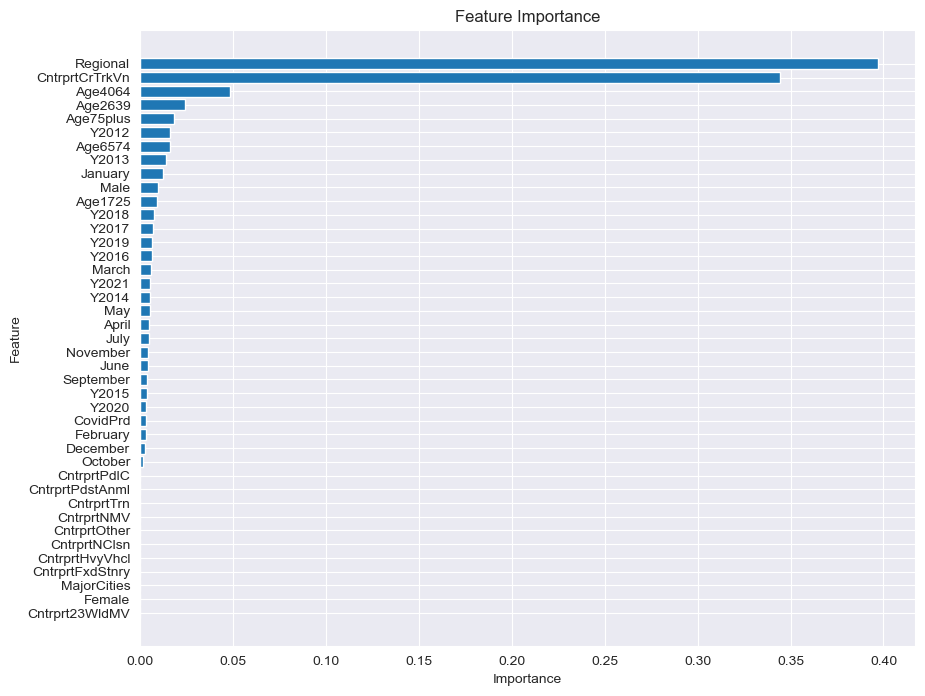

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model on the entire dataset (assuming X_train and y_train are defined)
xgb_model.fit(X_train, y_train)

# Get feature importance
importance = xgb_model.feature_importances_

# Convert into a pandas DataFrame for easy interpretation
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


Regional           0.394531
CntrprtCrTrkVn     0.349085
Age4064            0.047204
Age2639            0.021463
Y2012              0.016183
Age75plus          0.015788
Age6574            0.015160
Y2013              0.014708
January            0.010882
Male               0.010221
Age1725            0.008587
Y2018              0.007395
Y2019              0.007199
Y2017              0.007056
Y2021              0.006847
Y2016              0.006775
Y2014              0.005308
March              0.005200
July               0.004963
June               0.004934
Y2015              0.004912
April              0.004909
May                0.004872
November           0.004380
September          0.004372
December           0.003968
February           0.003542
Y2020              0.003367
CovidPrd           0.003239
October            0.002952
CntrprtTrn         0.000000
CntrprtPdstAnml    0.000000
CntrprtPdlC        0.000000
CntrprtNMV         0.000000
CntrprtOther       0.000000
CntrprtNClsn       0

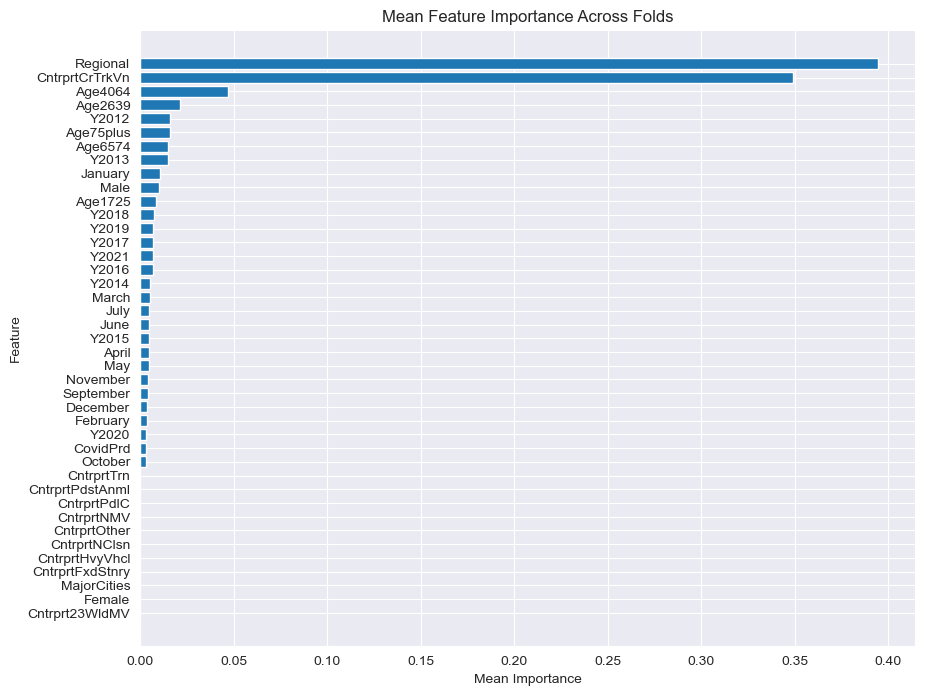

In [10]:
# Initialize a list to store feature importances
feature_importance_list = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred_xgb = xgb_model.predict(X_test)
    
    # Get feature importance and append to the list
    importance = xgb_model.feature_importances_
    feature_importance_list.append(importance)
    
    # (Previous metrics calculations here...)
    
# Convert the list of arrays into a DataFrame
feature_importance_df = pd.DataFrame(feature_importance_list, columns=X.columns)

# Calculate the mean importance across all folds
mean_importance = feature_importance_df.mean().sort_values(ascending=False)

# Print mean feature importance
print(mean_importance)

# Plot mean feature importance
plt.figure(figsize=(10, 8))
plt.barh(mean_importance.index, mean_importance.values)
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.title('Mean Feature Importance Across Folds')
plt.gca().invert_yaxis()
plt.show()


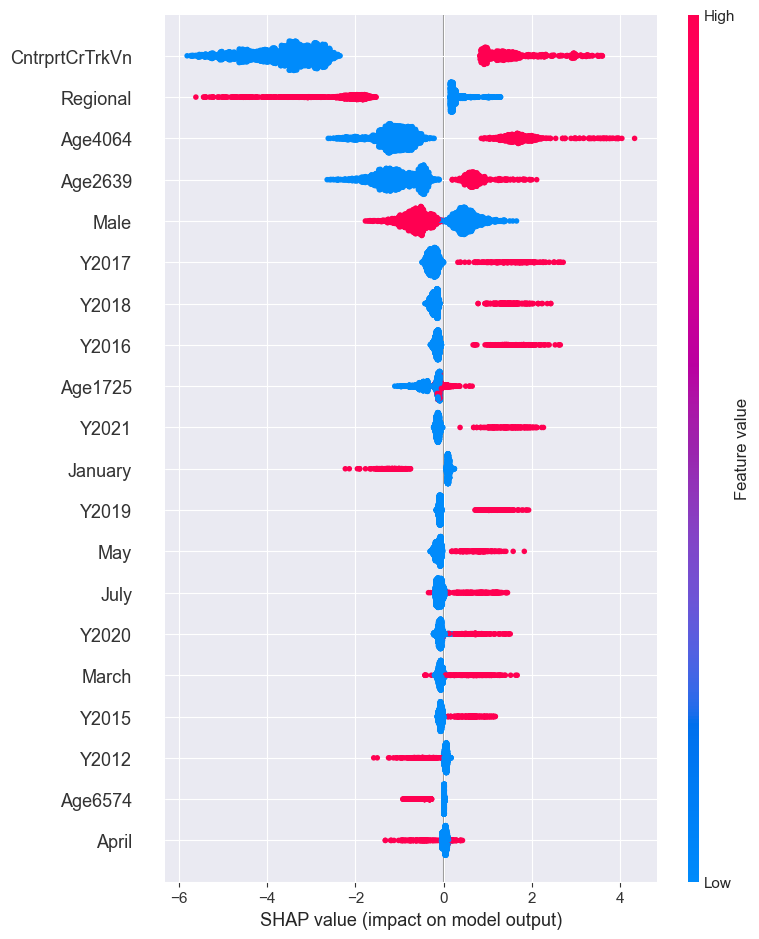

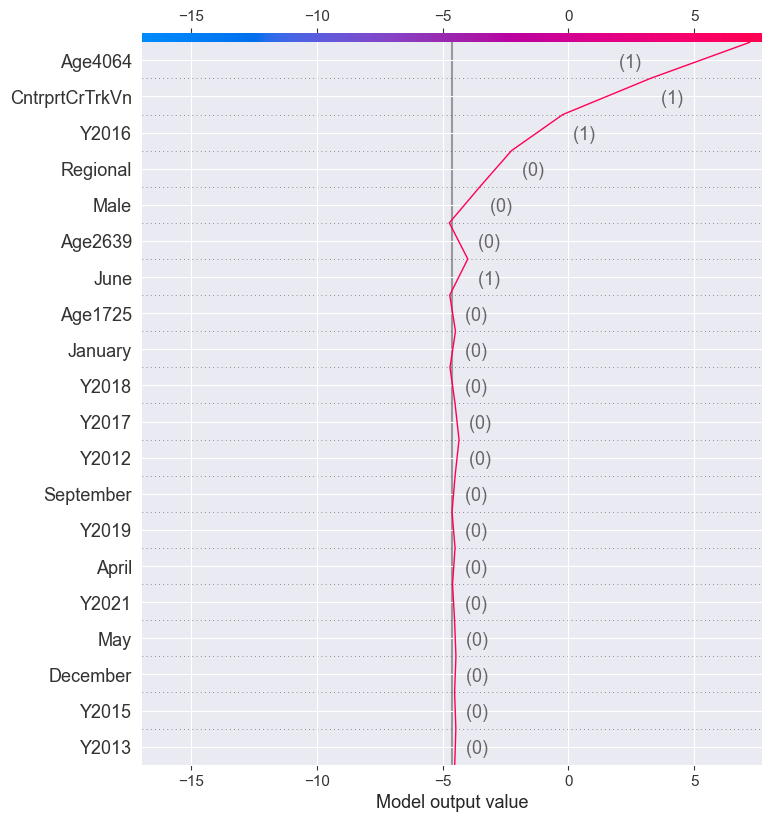

In [12]:
import shap
import matplotlib.pyplot as plt

# آموزش مدل بر روی کل دیتاست
xgb_model.fit(X_train, y_train)

# ایجاد شیء Explainer با استفاده از مدل آموزش داده شده
explainer = shap.TreeExplainer(xgb_model)

# محاسبه مقادیر SHAP برای داده‌های تست
shap_values = explainer.shap_values(X_test)

# رسم نمودار خلاصه برای داده‌های تست
shap.summary_plot(shap_values, X_test)

# نمودار تصمیم برای یک نمونه خاص (مثلاً اولین نمونه)
shap.decision_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np
from xgboost import XGBClassifier

# Number of folds
n_splits = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=22)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
saim_list = []
confusion_matrices = []

# Define a function to calculate SAIM based on confusion matrix
def calculate_saim(conf_matrix, weights):
    TN, FP, FN, TP = conf_matrix.ravel()
    
    # Precision and Recall for each class
    precision_1 = TN / (TN + FN) if (TN + FN) > 0 else 0
    recall_1 = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0
    
    precision_2 = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_2 = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_2 = 2 * precision_2 * recall_2 / (precision_2 + recall_2) if (precision_2 + recall_2) > 0 else 0
    
    # Calculate SAIM
    saim = weights[0] * f1_1 + weights[1] * f1_2
    return saim

# Define a function to calculate metrics for different thresholds
def evaluate_thresholds(y_true, y_pred_probs, thresholds, weights):
    best_threshold = 0.5
    best_saim = 0
    for threshold in thresholds:
        y_pred = (y_pred_probs[:, 1] >= threshold).astype(int)
        conf_matrix = confusion_matrix(y_true, y_pred)
        saim = calculate_saim(conf_matrix, weights)
        if saim > best_saim:
            best_saim = saim
            best_threshold = threshold
    return best_threshold, best_saim

# List to store best thresholds for each fold
best_thresholds = []

# Define a function for grid search to optimize threshold
def grid_search_threshold(y_true, y_pred_probs, weights):
    thresholds = np.arange(0.000, 1, 0.001)
    best_threshold, best_saim = evaluate_thresholds(y_true, y_pred_probs, thresholds, weights)
    return best_threshold

# Define class weights (you can adjust these based on your specific problem)
class_weights = [0.25, 0.75]

# Loop through the StratifiedKFold splits
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_train_pred_probs = xgb_model.predict_proba(X_train)
    
    # Grid search to find the best threshold on training data
    best_threshold = grid_search_threshold(y_train, y_train_pred_probs, class_weights)
    best_thresholds.append(best_threshold)
    
    y_test_pred_probs = xgb_model.predict_proba(X_test)
    y_pred_xgb = (y_test_pred_probs[:, 1] >= best_threshold).astype(int)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    
    # Calculate SAIM for this fold
    saim = calculate_saim(conf_matrix, class_weights)
    saim_list.append(saim)
    
    print(f'Confusion Matrix for Fold {fold} (Threshold {best_threshold}):\n', conf_matrix)
    print(f'SAIM for Fold {fold}: {saim}')

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)
mean_saim = np.mean(saim_list)
std_saim = np.std(saim_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean SAIM:', mean_saim)
print('SAIM Std Dev:', std_saim)
print('Mean Confusion Matrix:\n', mean_conf_matrix)
print('Best Thresholds:', best_thresholds)


Confusion Matrix for Fold 1 (Threshold 0.483):
 [[2442   13]
 [  14   48]]
SAIM for Fold 1: 0.8339913881728922
Confusion Matrix for Fold 2 (Threshold 0.435):
 [[2451    4]
 [  13   49]]
SAIM for Fold 2: 0.8882664380353023
Confusion Matrix for Fold 3 (Threshold 0.436):
 [[2437   17]
 [   9   53]]
SAIM for Fold 3: 0.8509461966604824
Confusion Matrix for Fold 4 (Threshold 0.375):
 [[2437   18]
 [   9   52]]
SAIM for Fold 4: 0.8440425773833351
Confusion Matrix for Fold 5 (Threshold 0.491):
 [[2438   17]
 [  11   50]]
SAIM for Fold 5: 0.8345100938009788
Mean Accuracy: 0.9900649826016158
Accuracy Std Dev: 0.001610215588339513
Mean Precision: 0.79153644090097
Precision Std Dev: 0.0682791822595136
Mean Recall: 0.8182971972501323
Recall Std Dev: 0.03234783911826296
Mean F1-score: 0.8021670301445646
F1-score Std Dev: 0.026371962243859164
Mean SAIM: 0.8503513388105983
SAIM Std Dev: 0.01998150196631781
Mean Confusion Matrix:
 [[2441.    13.8]
 [  11.2   50.4]]
Best Thresholds: [0.483, 0.435, 0.436

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Number of folds
n_splits = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=22)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Define a function to calculate metrics for different thresholds
def evaluate_thresholds(y_true, y_pred_probs, thresholds):
    best_threshold = 0.5
    best_f1 = 0
    for threshold in thresholds:
        y_pred = (y_pred_probs[:, 1] >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

# List to store best thresholds for each fold
best_thresholds = []

# Define a function for grid search to optimize threshold
def grid_search_threshold(y_true, y_pred_probs):
    thresholds = np.arange(0.000, 1, 0.001)
    best_threshold, best_f1 = evaluate_thresholds(y_true, y_pred_probs, thresholds)
    return best_threshold

# Loop through the StratifiedKFold splits
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_train_pred_probs = xgb_model.predict_proba(X_train)
    
    # Grid search to find the best threshold on training data
    best_threshold = grid_search_threshold(y_train, y_train_pred_probs)
    best_thresholds.append(best_threshold)
    
    y_test_pred_probs = xgb_model.predict_proba(X_test)
    y_pred_xgb = (y_test_pred_probs[:, 1] >= best_threshold).astype(int)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {fold} (Threshold {best_threshold}):\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)
print('Best Thresholds:', best_thresholds)


Confusion Matrix for Fold 1 (Threshold 0.483):
 [[2442   13]
 [  14   48]]
Confusion Matrix for Fold 2 (Threshold 0.435):
 [[2451    4]
 [  13   49]]
Confusion Matrix for Fold 3 (Threshold 0.436):
 [[2437   17]
 [   9   53]]
Confusion Matrix for Fold 4 (Threshold 0.375):
 [[2437   18]
 [   9   52]]
Confusion Matrix for Fold 5 (Threshold 0.491):
 [[2438   17]
 [  11   50]]
Mean Accuracy: 0.9900649826016158
Accuracy Std Dev: 0.001610215588339513
Mean Precision: 0.79153644090097
Precision Std Dev: 0.0682791822595136
Mean Recall: 0.8182971972501323
Recall Std Dev: 0.03234783911826296
Mean F1-score: 0.8021670301445646
F1-score Std Dev: 0.026371962243859164
Mean Confusion Matrix:
 [[2441.    13.8]
 [  11.2   50.4]]
Best Thresholds: [0.483, 0.435, 0.436, 0.375, 0.491]


Calibration

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from xgboost import XGBClassifier

# تعداد فولدها
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
uncertainty_list = []
risk_weighted_accuracy_list = []
confusion_matrices = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 1. فیت کردن مدل اصلی
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # 2. کالیبره کردن مدل فیت شده
    calibrated_model = CalibratedClassifierCV(xgb_model, method='sigmoid', cv=5)
    calibrated_model.fit(X_train, y_train)
    
    # 3. پیش‌بینی با مدل کالیبره شده
    y_pred_calibrated = calibrated_model.predict(X_test)
    y_prob_calibrated = calibrated_model.predict_proba(X_test)
    
    # 4. محاسبه عدم قطعیت به عنوان واریانس در احتمال‌های پیش‌بینی شده
    uncertainty = np.mean(np.var(y_prob_calibrated, axis=1))
    uncertainty_list.append(uncertainty)
    
    # 5. محاسبه دقت وزنی بر اساس ریسک
    risk_weighted_accuracy = accuracy_score(y_test, y_pred_calibrated) * (1 - uncertainty)
    risk_weighted_accuracy_list.append(risk_weighted_accuracy)
    
    # 6. محاسبه معیارهای کلاسیک
    accuracy_list.append(accuracy_score(y_test, y_pred_calibrated))
    precision_list.append(precision_score(y_test, y_pred_calibrated))
    recall_list.append(recall_score(y_test, y_pred_calibrated))
    f1_list.append(f1_score(y_test, y_pred_calibrated))
    
    # 7. محاسبه و ذخیره ماتریس سردرگمی
    conf_matrix = confusion_matrix(y_test, y_pred_calibrated)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# 8. محاسبه میانگین و انحراف معیار هر معیار
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)
mean_uncertainty = np.mean(uncertainty_list)
std_uncertainty = np.std(uncertainty_list)
mean_risk_weighted_accuracy = np.mean(risk_weighted_accuracy_list)
std_risk_weighted_accuracy = np.std(risk_weighted_accuracy_list)

# 9. محاسبه میانگین ماتریس سردرگمی
mean_conf_matrix = np.mean(confusion_matrices, axis=0).astype(int)

# 10. چاپ نتایج
print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Uncertainty:', mean_uncertainty)
print('Uncertainty Std Dev:', std_uncertainty)
print('Mean Risk-Weighted Accuracy:', mean_risk_weighted_accuracy)
print('Risk-Weighted Accuracy Std Dev:', std_risk_weighted_accuracy)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1220    8]
 [   6   25]]
Confusion Matrix for Fold 2:
 [[1215   13]
 [   8   23]]
Confusion Matrix for Fold 3:
 [[1224    3]
 [   9   22]]
Confusion Matrix for Fold 4:
 [[1221    6]
 [   4   27]]
Confusion Matrix for Fold 5:
 [[1220    7]
 [   3   28]]
Confusion Matrix for Fold 6:
 [[1217   10]
 [   5   26]]
Confusion Matrix for Fold 7:
 [[1225    2]
 [   6   25]]
Confusion Matrix for Fold 8:
 [[1220    7]
 [   6   25]]
Confusion Matrix for Fold 9:
 [[1223    5]
 [   7   23]]
Confusion Matrix for Fold 10:
 [[1218   10]
 [   5   25]]
Mean Accuracy: 0.9896683465692483
Accuracy Std Dev: 0.0027272708081754063
Mean Precision: 0.7859758898508897
Precision Std Dev: 0.0791105775555402
Mean Recall: 0.8083870967741935
Recall Std Dev: 0.05510330432288307
Mean F1-score: 0.7939939678037979
F1-score Std Dev: 0.04773283040366697
Mean Uncertainty: 0.24049421383003292
Uncertainty Std Dev: 0.000529908811891907
Mean Risk-Weighted Accuracy: 0.7516577477204094
Risk-Weighted 

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from xgboost import XGBClassifier

# تعداد فولدها
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
uncertainty_list = []
risk_weighted_accuracy_list = []
confusion_matrices = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 1. فیت کردن مدل اصلی
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # 2. کالیبره کردن مدل فیت شده
    calibrated_model = CalibratedClassifierCV(xgb_model, method='isotonic', cv=5)
    calibrated_model.fit(X_train, y_train)
    
    # 3. پیش‌بینی با مدل کالیبره شده
    y_pred_calibrated = calibrated_model.predict(X_test)
    y_prob_calibrated = calibrated_model.predict_proba(X_test)
    
    # 4. محاسبه عدم قطعیت به عنوان واریانس در احتمال‌های پیش‌بینی شده
    uncertainty = np.mean(np.var(y_prob_calibrated, axis=1))
    uncertainty_list.append(uncertainty)
    
    # 5. محاسبه دقت وزنی بر اساس ریسک
    risk_weighted_accuracy = accuracy_score(y_test, y_pred_calibrated) * (1 - uncertainty)
    risk_weighted_accuracy_list.append(risk_weighted_accuracy)
    
    # 6. محاسبه معیارهای کلاسیک
    accuracy_list.append(accuracy_score(y_test, y_pred_calibrated))
    precision_list.append(precision_score(y_test, y_pred_calibrated, average='weighted'))
    recall_list.append(recall_score(y_test, y_pred_calibrated, average='weighted'))
    f1_list.append(f1_score(y_test, y_pred_calibrated, average='weighted'))
    
    # 7. محاسبه و ذخیره ماتریس سردرگمی
    conf_matrix = confusion_matrix(y_test, y_pred_calibrated)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# 8. محاسبه میانگین و انحراف معیار هر معیار
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)
mean_uncertainty = np.mean(uncertainty_list)
std_uncertainty = np.std(uncertainty_list)
mean_risk_weighted_accuracy = np.mean(risk_weighted_accuracy_list)
std_risk_weighted_accuracy = np.std(risk_weighted_accuracy_list)

# 9. محاسبه میانگین ماتریس سردرگمی
mean_conf_matrix = np.mean(confusion_matrices, axis=0)
mean_conf_matrix = np.round(mean_conf_matrix).astype(int)

# 10. چاپ نتایج
print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Uncertainty:', mean_uncertainty)
print('Uncertainty Std Dev:', std_uncertainty)
print('Mean Risk-Weighted Accuracy:', mean_risk_weighted_accuracy)
print('Risk-Weighted Accuracy Std Dev:', std_risk_weighted_accuracy)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1208   20]
 [   1   30]]
Confusion Matrix for Fold 2:
 [[1206   22]
 [   3   28]]
Confusion Matrix for Fold 3:
 [[1213   14]
 [   1   30]]
Confusion Matrix for Fold 4:
 [[1210   17]
 [   1   30]]
Confusion Matrix for Fold 5:
 [[1213   14]
 [   0   31]]
Confusion Matrix for Fold 6:
 [[1201   26]
 [   1   30]]
Confusion Matrix for Fold 7:
 [[1210   17]
 [   1   30]]
Confusion Matrix for Fold 8:
 [[1208   19]
 [   1   30]]
Confusion Matrix for Fold 9:
 [[1211   17]
 [   2   28]]
Confusion Matrix for Fold 10:
 [[1206   22]
 [   0   30]]
Mean Accuracy: 0.9841841444303716
Accuracy Std Dev: 0.003064914221123597
Mean Precision: 0.9897019854763333
Precision Std Dev: 0.0015221582767267214
Mean Recall: 0.9841841444303716
Recall Std Dev: 0.003064914221123597
Mean F1-score: 0.9859254031698358
F1-score Std Dev: 0.0024950089430892664
Mean Uncertainty: 0.24129324428756188
Uncertainty Std Dev: 0.0008492311813716367
Mean Risk-Weighted Accuracy: 0.7467068803259403
Risk-Wei

In [10]:
# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
uncertainty_list = []
confusion_matrices = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Predict classes and probabilities
    y_pred_xgb = xgb_model.predict(X_test)
    y_prob_xgb = xgb_model.predict_proba(X_test)
    
    # Calculate and store uncertainty as the mean variance in predicted probabilities
    uncertainty = np.mean(np.var(y_prob_xgb, axis=1))
    uncertainty_list.append(uncertainty)
    
    # Store metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    # Store confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean and standard deviation of uncertainty
mean_uncertainty = np.mean(uncertainty_list)
std_uncertainty = np.std(uncertainty_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

# Print results
print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Uncertainty:', mean_uncertainty)
print('Uncertainty Std Dev:', std_uncertainty)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1221    7]
 [   6   25]]
Confusion Matrix for Fold 2:
 [[1217   11]
 [   9   22]]
Confusion Matrix for Fold 3:
 [[1225    2]
 [  10   21]]
Confusion Matrix for Fold 4:
 [[1222    5]
 [   4   27]]
Confusion Matrix for Fold 5:
 [[1220    7]
 [   4   27]]
Confusion Matrix for Fold 6:
 [[1219    8]
 [   5   26]]
Confusion Matrix for Fold 7:
 [[1225    2]
 [   8   23]]
Confusion Matrix for Fold 8:
 [[1220    7]
 [  10   21]]
Confusion Matrix for Fold 9:
 [[1224    4]
 [   7   23]]
Confusion Matrix for Fold 10:
 [[1219    9]
 [   6   24]]
Mean Accuracy: 0.9895887290364701
Accuracy Std Dev: 0.0025472344290426263
Mean Precision: 0.8012658253463879
Precision Std Dev: 0.07678825116672497
Mean Recall: 0.7760215053763441
Recall Std Dev: 0.06968214838591537
Mean F1-score: 0.7849055943313302
F1-score Std Dev: 0.04985136908306482
Mean Uncertainty: 0.2447793
Uncertainty Std Dev: 0.00054904376
Mean Confusion Matrix:
 [[1221.2    6.2]
 [   6.9   23.9]]


threshold moving f1

In [10]:
# Import additional libraries
from sklearn.metrics import precision_recall_curve

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

def find_best_threshold(y_true, y_probs):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)
    f1_scores = 2 * precisions * recalls / (precisions + recalls)
    best_index = np.argmax(f1_scores)
    return thresholds[best_index]

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Get the predicted probabilities for training set
    y_probs_train = xgb_model.predict_proba(X_train)[:, 1]
    
    # Find the best threshold on the training set
    best_threshold = find_best_threshold(y_train, y_probs_train)
    
    # Apply the threshold to the test set
    y_probs_test = xgb_model.predict_proba(X_test)[:, 1]
    y_pred_xgb = (y_probs_test >= best_threshold).astype(int)
    
    # Calculate metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)



Confusion Matrix for Fold 1:
 [[1221    7]
 [   7   24]]
Confusion Matrix for Fold 2:
 [[1216   12]
 [   8   23]]
Confusion Matrix for Fold 3:
 [[1225    2]
 [  10   21]]
Confusion Matrix for Fold 4:
 [[1218    9]
 [   4   27]]
Confusion Matrix for Fold 5:
 [[1220    7]
 [   4   27]]
Confusion Matrix for Fold 6:
 [[1219    8]
 [   5   26]]
Confusion Matrix for Fold 7:
 [[1225    2]
 [   7   24]]
Confusion Matrix for Fold 8:
 [[1219    8]
 [   7   24]]
Confusion Matrix for Fold 9:
 [[1222    6]
 [   7   23]]
Confusion Matrix for Fold 10:
 [[1220    8]
 [   6   24]]
Mean Accuracy: 0.9893503184069926
Accuracy Std Dev: 0.0021649844358905507
Mean Precision: 0.7869383784555374
Precision Std Dev: 0.07491506714282434
Mean Recall: 0.7889247311827956
Recall Std Dev: 0.056436864432864525
Mean F1-score: 0.7843544993556439
F1-score Std Dev: 0.03822742773911919
Mean Confusion Matrix:
 [[1220.5    6.9]
 [   6.5   24.3]]


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

def find_best_threshold(y_true, y_probs):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)
    f1_scores = 2 * precisions * recalls / (precisions + recalls)
    best_index = np.argmax(f1_scores)
    return thresholds[best_index]

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize Logistic Regression model
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    
    # Get the predicted probabilities for training set
    y_probs_train = lr_model.predict_proba(X_train)[:, 1]
    
    # Find the best threshold on the training set
    best_threshold = find_best_threshold(y_train, y_probs_train)
    
    # Apply the threshold to the test set
    y_probs_test = lr_model.predict_proba(X_test)[:, 1]
    y_pred_lr = (y_probs_test >= best_threshold).astype(int)
    
    # Calculate metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_lr))
    precision_list.append(precision_score(y_test, y_pred_lr))
    recall_list.append(recall_score(y_test, y_pred_lr))
    f1_list.append(f1_score(y_test, y_pred_lr))
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_lr)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1223    5]
 [   7   24]]
Confusion Matrix for Fold 2:
 [[1221    7]
 [   7   24]]
Confusion Matrix for Fold 3:
 [[1227    0]
 [   9   22]]
Confusion Matrix for Fold 4:
 [[1223    4]
 [   5   26]]
Confusion Matrix for Fold 5:
 [[1224    3]
 [   5   26]]
Confusion Matrix for Fold 6:
 [[1222    5]
 [   4   27]]
Confusion Matrix for Fold 7:
 [[1226    1]
 [   9   22]]
Confusion Matrix for Fold 8:
 [[1224    3]
 [   7   24]]
Confusion Matrix for Fold 9:
 [[1224    4]
 [   7   23]]
Confusion Matrix for Fold 10:
 [[1219    9]
 [   4   26]]
Mean Accuracy: 0.9916550597226204
Accuracy Std Dev: 0.0014742089697335765
Mean Precision: 0.8648867768816565
Precision Std Dev: 0.07304723543336454
Mean Recall: 0.7923655913978495
Recall Std Dev: 0.055964513970106794
Mean F1-score: 0.8230069333406362
F1-score Std Dev: 0.027884694584374665
Mean Confusion Matrix:
 [[1223.3    4.1]
 [   6.4   24.4]]


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
custom_metric_list = []
confusion_matrices = []

def balance_weighted_f1(precision, recall, beta):
    return (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

def find_best_threshold(y_true, y_probs, beta):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)
    custom_metrics = balance_weighted_f1(precisions, recalls, beta)
    best_index = np.argmax(custom_metrics)
    return thresholds[best_index], custom_metrics[best_index]

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Calculate imbalance ratio and beta
    imbalance_ratio = sum(y_train == 0) / sum(y_train == 1)
    beta = imbalance_ratio / 2
    
    # Initialize Logistic Regression model
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    
    # Get the predicted probabilities for training set
    y_probs_train = lr_model.predict_proba(X_train)[:, 1]
    
    # Find the best threshold on the training set using our custom metric
    best_threshold, best_metric = find_best_threshold(y_train, y_probs_train, beta)
    
    # Apply the threshold to the test set
    y_probs_test = lr_model.predict_proba(X_test)[:, 1]
    y_pred_lr = (y_probs_test >= best_threshold).astype(int)
    
    # Calculate metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_lr))
    precision_list.append(precision_score(y_test, y_pred_lr))
    recall_list.append(recall_score(y_test, y_pred_lr))
    custom_metric_list.append(best_metric)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_lr)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_custom_metric = np.mean(custom_metric_list)
std_custom_metric = np.std(custom_metric_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0).astype(int)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean Custom Metric (Balance-Weighted F1):', mean_custom_metric)
print('Custom Metric Std Dev:', std_custom_metric)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1202   26]
 [   0   31]]
Confusion Matrix for Fold 2:
 [[1202   26]
 [   2   29]]
Confusion Matrix for Fold 3:
 [[1209   18]
 [   0   31]]
Confusion Matrix for Fold 4:
 [[1200   27]
 [   1   30]]
Confusion Matrix for Fold 5:
 [[1203   24]
 [   0   31]]
Confusion Matrix for Fold 6:
 [[1199   28]
 [   0   31]]
Confusion Matrix for Fold 7:
 [[1205   22]
 [   0   31]]
Confusion Matrix for Fold 8:
 [[1205   22]
 [   1   30]]
Confusion Matrix for Fold 9:
 [[1208   20]
 [   2   28]]
Confusion Matrix for Fold 10:
 [[1204   24]
 [   0   30]]
Mean Accuracy: 0.9806870342753162
Accuracy Std Dev: 0.0024612262798702008
Mean Precision: 0.5619878945732955
Precision Std Dev: 0.03222542948390991
Mean Recall: 0.9804301075268818
Recall Std Dev: 0.02618803904134632
Mean Custom Metric (Balance-Weighted F1): 0.9980893956356984
Custom Metric Std Dev: 6.043177954955338e-05
Mean Confusion Matrix:
 [[1203   23]
 [   0   30]]


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
custom_metric_list = []
confusion_matrices = []

def balance_weighted_f1(precision, recall, beta):
    return (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

def find_best_threshold(y_true, y_probs, beta):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)
    custom_metrics = balance_weighted_f1(precisions, recalls, beta)
    best_index = np.argmax(custom_metrics)
    return thresholds[best_index], custom_metrics[best_index]

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Calculate imbalance ratio and beta
    imbalance_ratio = sum(y_train == 0) / sum(y_train == 1)
    beta = imbalance_ratio / 2
    
    # Initialize XGBoost model
    xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    
    # Get the predicted probabilities for training set
    y_probs_train = xgb_model.predict_proba(X_train)[:, 1]
    
    # Find the best threshold on the training set using our custom metric
    best_threshold, best_metric = find_best_threshold(y_train, y_probs_train, beta)
    
    # Apply the threshold to the test set
    y_probs_test = xgb_model.predict_proba(X_test)[:, 1]
    y_pred_xgb = (y_probs_test >= best_threshold).astype(int)
    
    # Calculate metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    custom_metric_list.append(best_metric)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_custom_metric = np.mean(custom_metric_list)
std_custom_metric = np.std(custom_metric_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0).astype(int)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean Custom Metric (Balance-Weighted F1):', mean_custom_metric)
print('Custom Metric Std Dev:', std_custom_metric)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1209   19]
 [   4   27]]
Confusion Matrix for Fold 2:
 [[1206   22]
 [   2   29]]
Confusion Matrix for Fold 3:
 [[1215   12]
 [   1   30]]
Confusion Matrix for Fold 4:
 [[1213   14]
 [   2   29]]
Confusion Matrix for Fold 5:
 [[1210   17]
 [   2   29]]
Confusion Matrix for Fold 6:
 [[1204   23]
 [   2   29]]
Confusion Matrix for Fold 7:
 [[1215   12]
 [   1   30]]
Confusion Matrix for Fold 8:
 [[1208   19]
 [   2   29]]
Confusion Matrix for Fold 9:
 [[1213   15]
 [   3   27]]
Confusion Matrix for Fold 10:
 [[1208   20]
 [   1   29]]
Mean Accuracy: 0.9846611551045509
Accuracy Std Dev: 0.003236633485587074
Mean Precision: 0.6285561640460804
Precision Std Dev: 0.054127029597945374
Mean Recall: 0.9350537634408603
Recall Std Dev: 0.029108621196425457
Mean Custom Metric (Balance-Weighted F1): 0.9987490314051352
Custom Metric Std Dev: 0.00014837208410480406
Mean Confusion Matrix:
 [[1210   17]
 [   2   28]]
